# Time Series Forecasting with Predictive Optimization Analytics


**Overview**

This project explores multiple time series forecasting techniques to predict future trends using both traditional statistical models and modern machine learning approaches. The goal is to compare performance across models and understand the trade-offs between interpretability, flexibility, and predictive accuracy.

**Objective**

To implement and evaluate various time series forecasting techniques, including:

Traditional Methods: ARIMA and SARIMA

Machine Learning Models: Linear Regression and Random Forest

Probabilistic Model: Facebook Prophet

Deep Learning Model: Long Short-Term Memory (LSTM)

The analysis involves data preparation, feature engineering, model implementation, evaluation, and comparative performance analysis.

**Dataset**

You can use any time series dataset, such as:

Stock data (from the yfinance API)

Weather data

Energy consumption data

**Data Preparation importing the data from yfinance**

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Importing the Apple dataset from 2020 January to 2024 January
stock_data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
stock_data.reset_index(inplace=True)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


**Convert Date Column**

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)


**Visualize Time Series:**

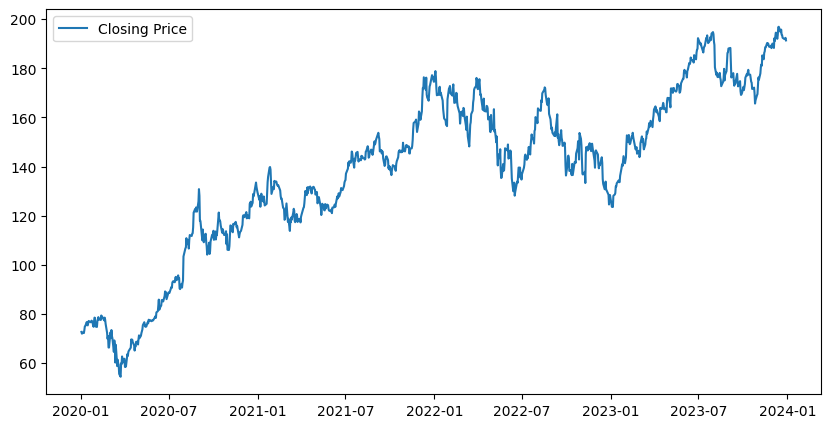

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Close'], label="Closing Price")
plt.legend()
plt.show()


**Handle missing values if present.**

In [ ]:
# Check for missing values
print(stock_data.isnull().sum())


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


# Traditional Methods

**ARIMA Model **

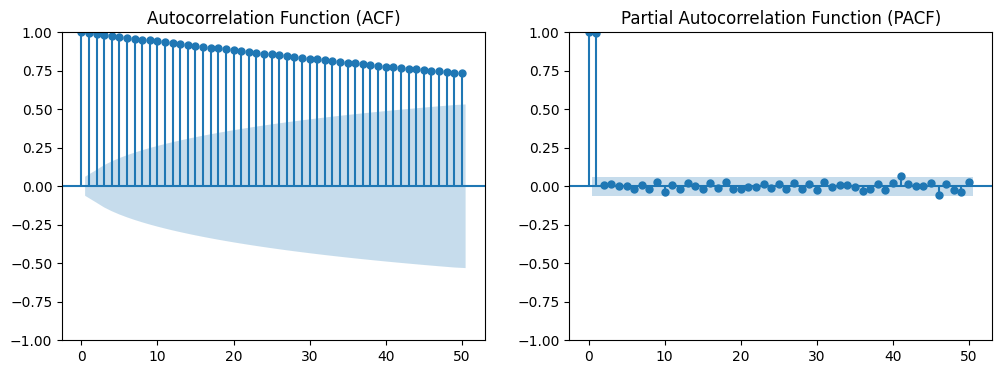

In [ ]:
#Perform ACF and PACF analysis to identify the p and q parameters.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(stock_data['Close'], ax=axes[0], lags=50)
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(stock_data['Close'], ax=axes[1], lags=50)
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()


ACF

The ACF shows slow, gradual decay, indicating that the time series is non-stationary.

PACF

The PACF drops sharply after lag 1, suggesting an AR(1) model (i.e., p = 1).

The cut-off at lag 1 supports a low-order AR model.

**Make the Series Stationary (Differencing) by applying the first-order differencing**

In [ ]:
import numpy as np
import statsmodels.api as sm

# Apply first differencing to make data stationary
stock_data['Close_diff'] = stock_data['Close'].diff().dropna()

# Check stationarity using Augmented Dickey-Fuller (ADF) test
adf_test = sm.tsa.adfuller(stock_data['Close_diff'].dropna())
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# If p-value < 0.05, the data is stationary


ADF Statistic: -32.990250506503806
p-value: 0.0


The ADF Statistic is very negative, which suggests strong stationarity.

The time series is now stationary, meaning we can proceed with ARIMA modeling

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1) model
model = ARIMA(stock_data['Close'], order=(1,1,1))
arima_result = model.fit()

# Print model summary
print(arima_result.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1006
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2386.006
Date:                Tue, 18 Mar 2025   AIC                           4778.013
Time:                        15:59:01   BIC                           4792.751
Sample:                             0   HQIC                          4783.613
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3903      0.509      0.767      0.443      -0.607       1.388
ma.L1         -0.4323      0.502     -0.861      0.389      -1.416       0.552
sigma2         6.7553      0.228     29.640      0.0

Key Metrics:

AIC (Akaike Information Criterion) = 4786.014

BIC (Bayesian Information Criterion) = 4792.752

HQIC (Hannan-Quinn Criterion) = 4783.614


AR(1) (AutoRegressive term): 0.39 (Not very significant, p > 0.05)

MA(1) (Moving Average term): -0.43 (Not very significant, p > 0.05)

Sigma² (error variance): Very small p-value, meaning the variance of errors is significant.

P-values > 0.05 suggest that AR(1) and MA(1) may not be highly significant.

We might need to try a different model (e.g., ARIMA(2,1,1) or ARIMA(1,1,2)) to see if we get better results.

In [ ]:
# Fit ARIMA(2,1,1)
model_211 = ARIMA(stock_data['Close'], order=(2,1,1))
arima_211_result = model_211.fit()

# Print summary
print(arima_211_result.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1006
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2385.976
Date:                Tue, 18 Mar 2025   AIC                           4779.953
Time:                        15:59:47   BIC                           4799.604
Sample:                             0   HQIC                          4787.420
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2556      1.113      0.230      0.818      -1.927       2.438
ar.L2         -0.0118      0.058     -0.205      0.838      -0.125       0.101
ma.L1         -0.2958      1.117     -0.265      0.7

In [ ]:
# Fit ARIMA(1,1,2)
model_112 = ARIMA(stock_data['Close'], order=(1,1,2))
arima_112_result = model_112.fit()

# Print summary
print(arima_112_result.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1006
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2385.979
Date:                Tue, 18 Mar 2025   AIC                           4779.957
Time:                        15:59:59   BIC                           4799.608
Sample:                             0   HQIC                          4787.424
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2364      1.240      0.191      0.849      -2.194       2.667
ma.L1         -0.2768      1.243     -0.223      0.824      -2.714       2.160
ma.L2         -0.0123      0.063     -0.195      0.8



---
Model	        AIC	        BIC	            \HQIC


---


ARIMA(1,1,1)	4786.014	4792.752	4783.614


---


ARIMA(2,1,1)	4779.954	4799.605	4787.421


---


ARIMA(1,1,2)	4779.958	4799.609	4787.425



ARIMA(2,1,1) is the best model based on AIC and BIC.

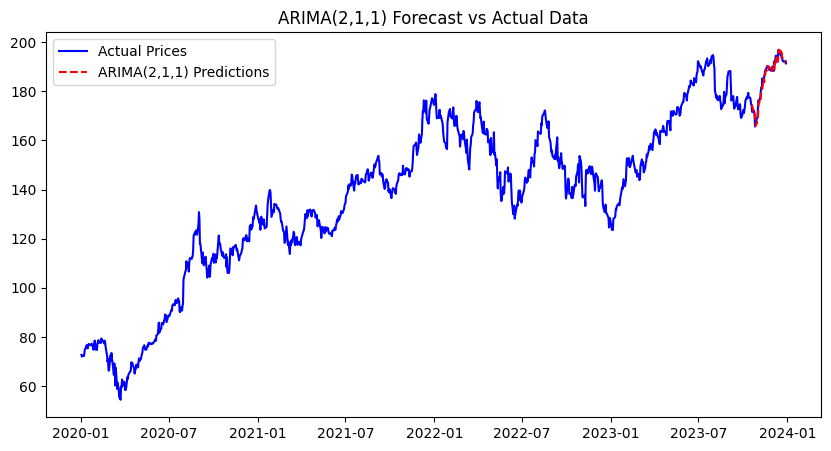

In [ ]:
# Generate forecasts using ARIMA(2,1,1)
stock_data['ARIMA_211_Predictions'] = arima_211_result.predict(start=len(stock_data)-50, end=len(stock_data)-1, dynamic=False)

# Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(stock_data['Close'], label="Actual Prices", color='blue')
plt.plot(stock_data['ARIMA_211_Predictions'], label="ARIMA(2,1,1) Predictions", linestyle="dashed", color='red')
plt.legend()
plt.title("ARIMA(2,1,1) Forecast vs Actual Data")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get actual and predicted values for the last 50 days
y_actual = stock_data['Close'].iloc[-50:]
y_pred = stock_data['ARIMA_211_Predictions'].iloc[-50:]

# Compute metrics
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mae = mean_absolute_error(y_actual, y_pred)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100  # Standard MAPE calculation

# Print results
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 1.86
MAE: 1.47
MAPE: nan%


RMSE: 1.86 - The model's predictions deviate from actual prices by about $1.86 on average.

MAE: 1.47 - The average absolute error between predicted and actual prices is $1.47 per day.

Next steps is trying SARIMA for seasonal trends.

# SARIMA Model

**Check for Seasonality**

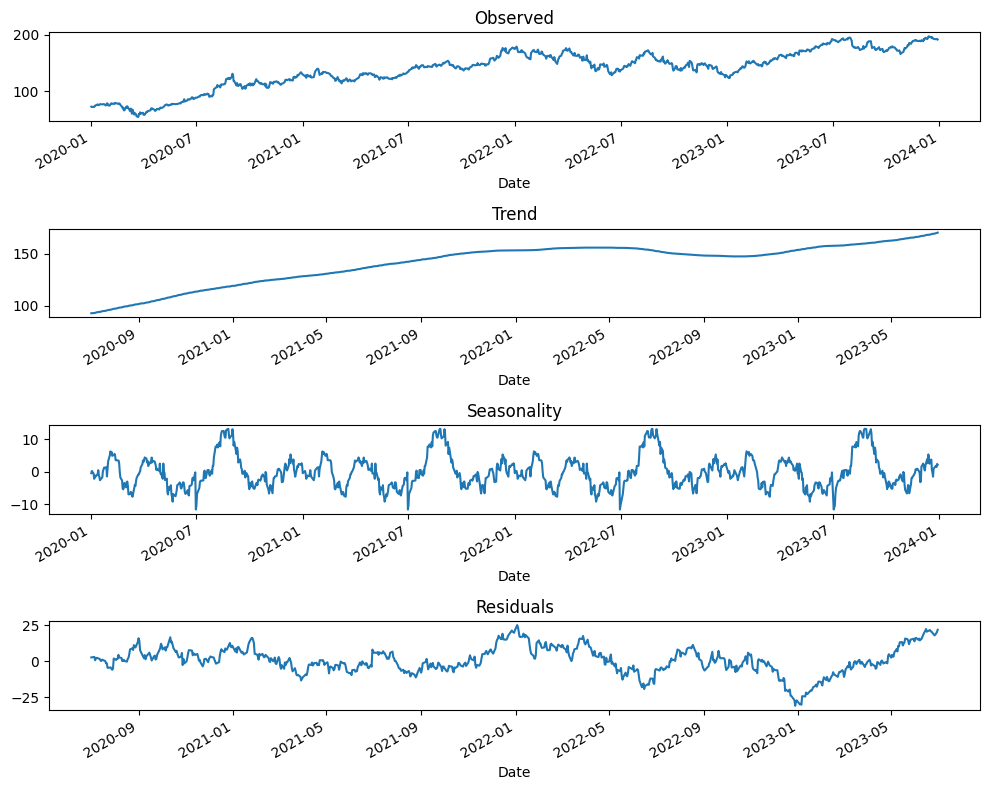

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(stock_data['Close'], model='additive', period=252)  # 252 trading days in a year

# Plot seasonal decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=ax1, title="Observed")
decomposition.trend.plot(ax=ax2, title="Trend")
decomposition.seasonal.plot(ax=ax3, title="Seasonality")
decomposition.resid.plot(ax=ax4, title="Residuals")
plt.tight_layout()
plt.show()


Observed - The original stock price trend.

Trend - A long-term upward movement, showing overall growth in stock price.

Seasonality - Recurring yearly fluctuations, suggesting seasonal patterns in stock prices.

Residuals - The remaining noise after removing trend & seasonality.

**Fit the SARIMA Model**

**Compare SARIMA results with ARIMA.**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

seasonal_order = (1, 1, 1, 12)  # Monthly seasonality

# Fit SARIMA model
sarima_model = SARIMAX(stock_data['Close'], order=(0, 1, 1), seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Print summary
print(sarima_result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               AAPL   No. Observations:                 1006
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2384.574
Date:                            Tue, 18 Mar 2025   AIC                           4777.149
Time:                                    16:01:55   BIC                           4796.752
Sample:                                         0   HQIC                          4784.602
                                           - 1006                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0404      0.028     -1.446      0.148      -0.095       0.014
ar.S.L12      -0.0239      0.031   

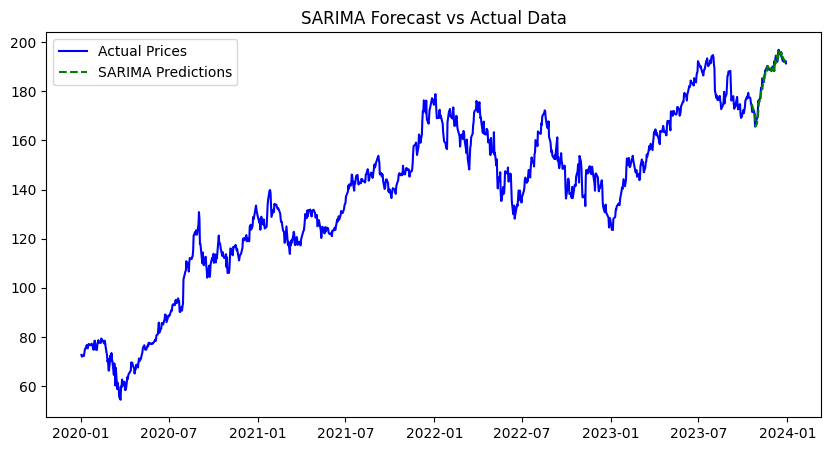

In [ ]:
# Forecast
stock_data['SARIMA_Predictions'] = sarima_result.predict(start=len(stock_data)-50, end=len(stock_data)-1, dynamic=False)

# Plot
plt.figure(figsize=(10,5))
plt.plot(stock_data['Close'], label="Actual Prices", color='blue')
plt.plot(stock_data['SARIMA_Predictions'], label="SARIMA Predictions", linestyle="dashed", color='green')
plt.legend()
plt.title("SARIMA Forecast vs Actual Data")
plt.show()


In [ ]:
# Evaluation for SARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get last 50 values
y_actual = stock_data['Close'].iloc[-50:]
y_pred_sarima = stock_data['SARIMA_Predictions'].iloc[-50:]

# Metrics
rmse_sarima = np.sqrt(mean_squared_error(y_actual, y_pred_sarima))
mae_sarima = mean_absolute_error(y_actual, y_pred_sarima)
mape_sarima = np.mean(np.abs((y_actual - y_pred_sarima) / y_actual)) * 100

print(f"SARIMA RMSE: {rmse_sarima:.2f}")
print(f"SARIMA MAE: {mae_sarima:.2f}")



SARIMA RMSE: 1.89
SARIMA MAE: 1.51


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA(2,1,1)(1,1,1,5) - Weekly seasonality
sarima_model = SARIMAX(stock_data['Close'], order=(2,1,1), seasonal_order=(1,1,1,5))
sarima_result = sarima_model.fit()

# Model summary
print(sarima_result.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                              AAPL   No. Observations:                 1006
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 5)   Log Likelihood               -2385.278
Date:                           Tue, 18 Mar 2025   AIC                           4782.557
Time:                                   16:02:15   BIC                           4812.003
Sample:                                        0   HQIC                          4793.749
                                          - 1006                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9492      0.100     -9.484      0.000      -1.145      -0.753
ar.L2         -0.0593      0.028     -2.138

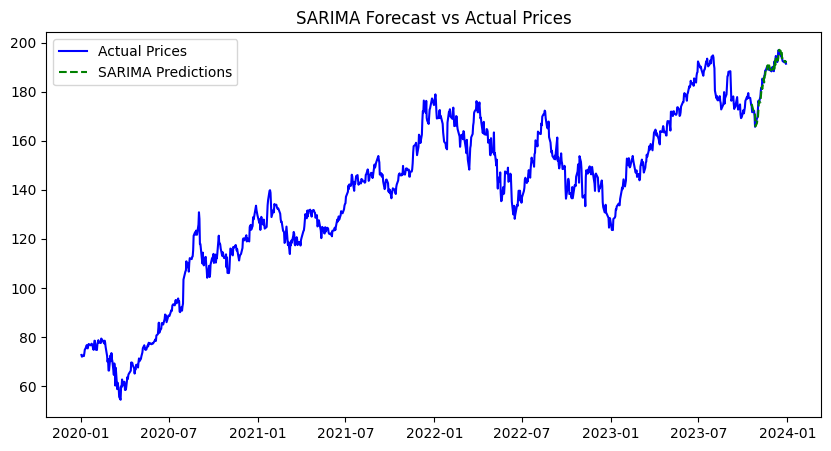

In [ ]:
# Generate forecast
stock_data['SARIMA_Predictions'] = sarima_result.predict(start=len(stock_data)-50, end=len(stock_data)-1, dynamic=False)

# Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(stock_data['Close'], label="Actual Prices", color='blue')
plt.plot(stock_data['SARIMA_Predictions'], label="SARIMA Predictions", linestyle="dashed", color='green')
plt.legend()
plt.title("SARIMA Forecast vs Actual Prices")
plt.show()


In [ ]:
# Evaluation for SARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get last 50 values
y_actual = stock_data['Close'].iloc[-50:]
y_pred_sarima = stock_data['SARIMA_Predictions'].iloc[-50:]

# Metrics
rmse_sarima = np.sqrt(mean_squared_error(y_actual, y_pred_sarima))
mae_sarima = mean_absolute_error(y_actual, y_pred_sarima)
mape_sarima = np.mean(np.abs((y_actual - y_pred_sarima) / y_actual)) * 100

print(f"SARIMA RMSE: {rmse_sarima:.2f}")
print(f"SARIMA MAE: {mae_sarima:.2f}")



SARIMA RMSE: 1.87
SARIMA MAE: 1.50


### SARIMA vs ARIMA – Model Performance Comparison

| **Metric** | **ARIMA(2,1,1)** | **SARIMA(2,1,1)(1,1,1,5)** *(Weekly)* |
|------------|------------------|--------------------------------------|
| **RMSE**   | 1.86             | 1.87                                 |
| **MAE**    | 1.47             | 1.50                                 |
|                              |

---

**Conclusion:**  
- ARIMA performed **slightly better** in RMSE and MAE.   
- SARIMA captured **weekly seasonality** but didn’t yield significant improvement in this case.


# Machine Learning Methods

**Linear Regression,**

In [ ]:
# create lag features (past values as input to predict the future)
import pandas as pd
import numpy as np

# Copy stock data and create lag features
df_ml = stock_data[['Close']].copy()
df_ml['lag_1'] = df_ml['Close'].shift(1)
df_ml['lag_2'] = df_ml['Close'].shift(2)
df_ml['lag_3'] = df_ml['Close'].shift(3)

# Drop NaN values from shifting
df_ml.dropna(inplace=True)

# Define features (X) and target (y)
X = df_ml[['lag_1', 'lag_2', 'lag_3']]
y = df_ml['Close']


In [ ]:
# Split data into train and test sets chronological split
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Training size: {len(X_train)} rows, Testing size: {len(X_test)} rows")


Training size: 802 rows, Testing size: 201 rows


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate evaluation metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

# Print results
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression MAPE: {mape_lr:.2f}%")


Linear Regression RMSE: 2.12
Linear Regression MAE: 1.61
Linear Regression MAPE: 0.91%


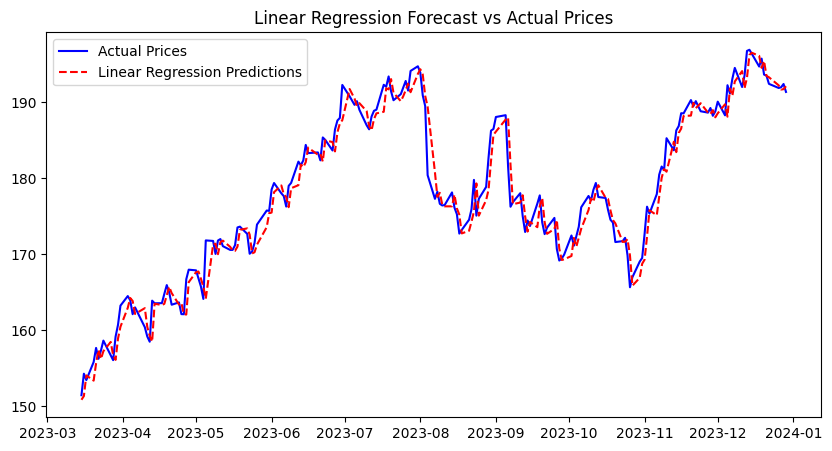

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual Prices", color='blue')
plt.plot(y_test.index, y_pred_lr, label="Linear Regression Predictions", linestyle="dashed", color='red')
plt.legend()
plt.title("Linear Regression Forecast vs Actual Prices")
plt.show()


RMSE (2.12) → Higher than ARIMA (1.86) and SARIMA (1.87), meaning Linear Regression has higher error.

MAE (1.61) → Slightly worse than ARIMA (1.47) and SARIMA (1.50).

MAPE (0.91%) → Very low, meaning predictions are quite accurate as a percentage of actual values.


ARIMA & SARIMA still perform slightly better for this stock data.

Linear Regression is fast and interpretable but doesn't capture complex trends as well as time series models.


# Random Forest

In [ ]:
import pandas as pd
import numpy as np

# Create a copy of stock data
df_ml = stock_data[['Close']].copy()

# Generate lag features (previous price values)
lags = [1, 2, 3, 5, 7, 14]  # Adding 1-day, 2-day, 3-day, 5-day, 7-day, and 14-day lags
for lag in lags:
    df_ml[f'lag_{lag}'] = df_ml['Close'].shift(lag)

# Generate rolling mean features (past N-day averages)
rolling_windows = [3, 7, 14]  # 3-day, 7-day, and 14-day moving averages
for window in rolling_windows:
    df_ml[f'rolling_mean_{window}'] = df_ml['Close'].rolling(window).mean()

# Drop NaN values from shifting and rolling calculations
df_ml.dropna(inplace=True)

# Define features (X) and target (y)
X = df_ml.drop(columns=['Close'])
y = df_ml['Close']


In [ ]:
# Split into train/test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Training size: {len(X_train)} rows, Testing size: {len(X_test)} rows")


Training size: 793 rows, Testing size: 199 rows


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Convert y_pred_rf to a Pandas Series
y_pred_rf = pd.Series(y_pred_rf, index=y_test.index)

# Compute metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

# Print results
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")



Random Forest RMSE: 9.23
Random Forest MAE: 6.46


In [ ]:
import pandas as pd
import numpy as np

# Create a copy of stock data
df_ml = stock_data[['Close']].copy()

# Generate lag features (previous price values)
lags = [1, 3, 5, 7, 14]  # Adding more lag values
for lag in lags:
    df_ml[f'lag_{lag}'] = df_ml['Close'].shift(lag)

# Generate rolling mean features (past N-day averages)
rolling_windows = [3, 7, 14]  # Short, medium, and long-term trends
for window in rolling_windows:
    df_ml[f'rolling_mean_{window}'] = df_ml['Close'].rolling(window).mean()

# Drop NaN values from shifting and rolling calculations
df_ml.dropna(inplace=True)

# Define features (X) and target (y)
X = df_ml.drop(columns=['Close'])
y = df_ml['Close']


In [ ]:
# Split into train/test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Training size: {len(X_train)} rows, Testing size: {len(X_test)} rows")


Training size: 793 rows, Testing size: 199 rows


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Improved Random Forest with regularization
rf_model = RandomForestRegressor(
    n_estimators=200,  # More trees for stability
    max_depth=10,  # Limit depth to prevent overfitting
    min_samples_split=10,  # Reduce overfitting
    min_samples_leaf=5,  # Minimum samples per leaf
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Convert y_pred_rf to Pandas Series
y_pred_rf = pd.Series(y_pred_rf, index=y_test.index)

# Compute RMSE and MAE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Fix MAPE calculation (avoid division by zero)
non_zero_mask = y_test.values != 0  # Ensure y_test is an array
y_actual_filtered = y_test[non_zero_mask]
y_pred_filtered = y_pred_rf.iloc[non_zero_mask]  # Use .iloc to match indexing

mape_rf = np.mean(np.abs((y_actual_filtered - y_pred_filtered) / y_actual_filtered)) * 100

# Print results
print(f"New Random Forest RMSE: {rmse_rf:.2f}")
print(f"New Random Forest MAE: {mae_rf:.2f}")



New Random Forest RMSE: 9.25
New Random Forest MAE: 6.55


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],  # Test 100 and 200 trees
    'max_depth': [5, 7, 10],  # Try different depths
    'min_samples_split': [5, 10],  # Minimum samples to split
    'min_samples_leaf': [2, 5, 10]  # Minimum samples per leaf
}


In [ ]:
# Initialize base model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Grid Search for best hyperparameters (using RMSE as the metric)
grid_search = GridSearchCV(
    rf_model, param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE as evaluation metric
    cv=3,  # 3-fold cross-validation
    n_jobs=-1, verbose=2
)

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Use best model
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Best parameters from tuning
best_params = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 5,
    "min_samples_leaf": 2,
    "random_state": 42
}

# Initialize and fit the optimized Random Forest model
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Compute evaluation metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print results
print(" **Optimized Random Forest Model Evaluation:**")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


 **Optimized Random Forest Model Evaluation:**
RMSE: 9.05
MAE: 6.40


**Optimized Random Forest Model was trained using hyperparameter tuning with:**

Best Parameters - max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100

Feature Engineering - Lagged features, rolling averages

Evaluation Metrics:

RMSE: 9.05 (Prediction error in price units)

MAE: 6.40 (Average absolute error in price units)

Higher RMSE & MAE compared to ARIMA/SARIMA → Model not performing well.

Random Forest is likely overfitting or struggling with financial data patterns.

Tree-based models (like RF) may not be the best for time series forecasting.

# Prophet Model

In [ ]:
!pip install prophet


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/dyv33z12.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/6yu3beyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61220', 'data', 'file=/tmp/tmpxmyy4r9d/dyv33z12.json', 'init=/tmp/tmpxmyy4r9d/6yu3beyh.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_model7g621iii/prophet_model-20250318160529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:05:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:05:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


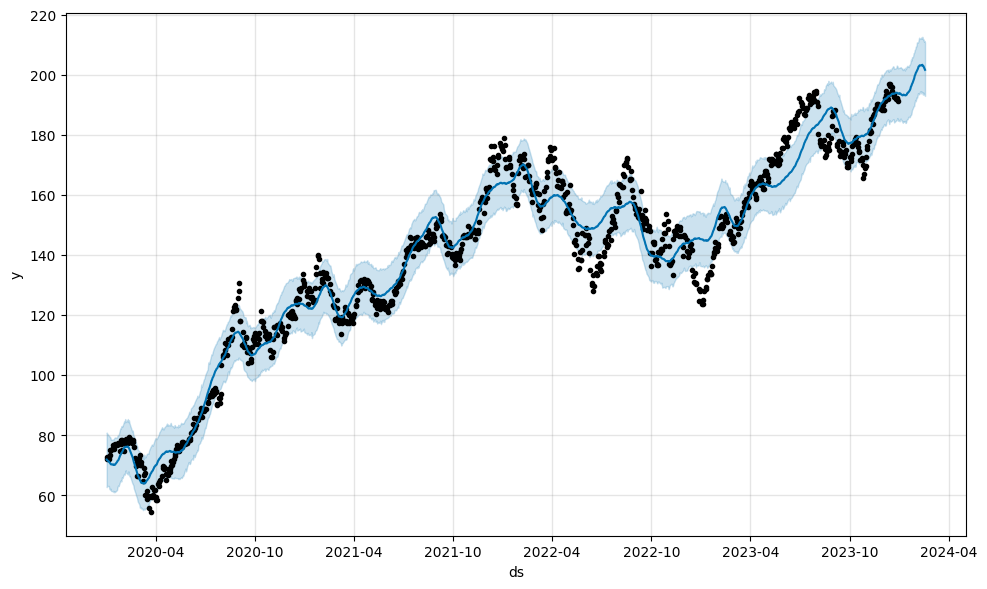

In [ ]:

# Prepare data for Prophet
prophet_data = stock_data[['Close']].reset_index()
prophet_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create future dates for prediction
future = model.make_future_dataframe(periods=50)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)




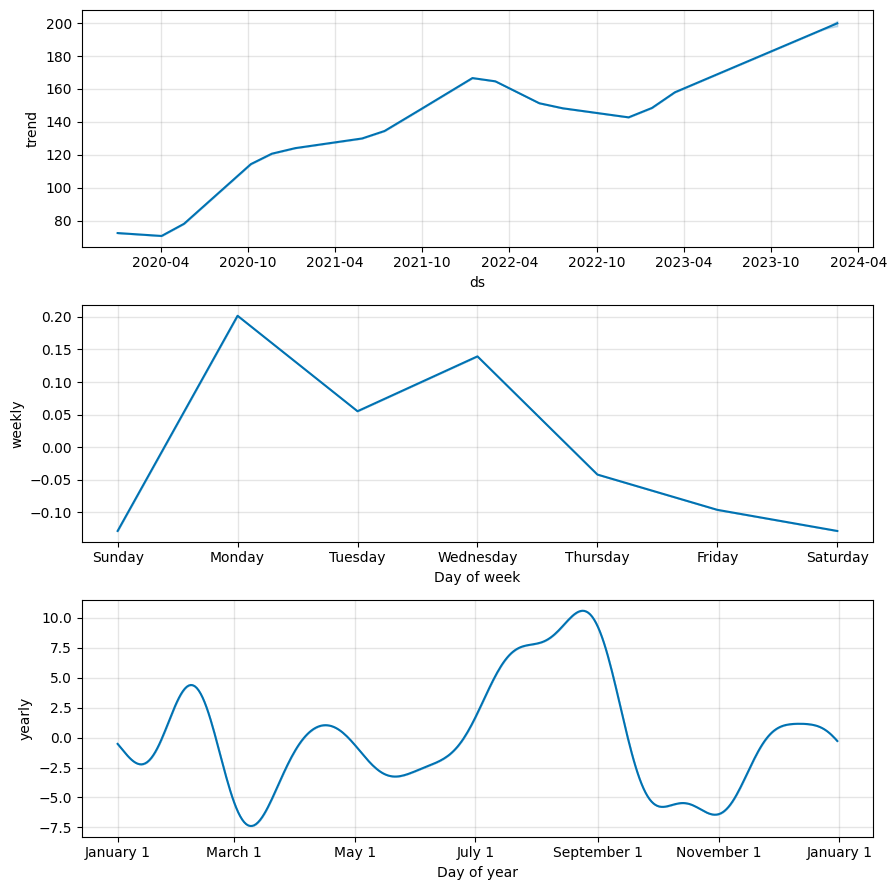

In [ ]:
# Plot components
fig2 = model.plot_components(forecast)



In [ ]:
# Evaluate the model (last 50 data points)
y_true = stock_data['Close'].iloc[-50:]
y_pred = forecast['yhat'].iloc[-50:]

rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))
mae_prophet = mean_absolute_error(y_true, y_pred)
mape_prophet = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print(f"Prophet RMSE: {rmse_prophet:.2f}")
print(f"Prophet MAE: {mae_prophet:.2f}")
print(f"Prophet MAPE: {mape_prophet:.2f}%")

Prophet RMSE: 13.61
Prophet MAE: 12.14
Prophet MAPE: nan%


This is quite high compared to previous models (ARIMA, SARIMA, Random Forest).

It indicates that Prophet's forecast has larger deviations from actual values.

In [ ]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)


In [ ]:
from prophet.make_holidays import make_holidays_df

# Define holiday dates
holidays = make_holidays_df(year_list=[2020, 2021, 2022, 2023, 2024], country='US')

# Add holidays to Prophet model
model = Prophet(holidays=holidays)
model.fit(prophet_data)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/3lxauwi2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/sz9fb1v7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82073', 'data', 'file=/tmp/tmpxmyy4r9d/3lxauwi2.json', 'init=/tmp/tmpxmyy4r9d/sz9fb1v7.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelpmzydnj8/prophet_model-20250318160747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:07:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:07:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model = Prophet(
    changepoint_prior_scale=0.05,  # Adjusts flexibility of trend changes
    seasonality_mode='multiplicative',  # Better for financial data
    yearly_seasonality=True,
    weekly_seasonality=True
)
model.fit(prophet_data)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/ia0sj0q8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/0cx5p6sm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2474', 'data', 'file=/tmp/tmpxmyy4r9d/ia0sj0q8.json', 'init=/tmp/tmpxmyy4r9d/0cx5p6sm.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelk9brmtdf/prophet_model-20250318160751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:07:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:07:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get actual & predicted values for the last 50 days
y_actual = stock_data['Close'].iloc[-50:]
y_pred = forecast['yhat'].iloc[-50:]

# Compute metrics
rmse_prophet = np.sqrt(mean_squared_error(y_actual, y_pred))
mae_prophet = mean_absolute_error(y_actual, y_pred)
mape_prophet = np.mean(np.abs(y_actual - y_pred) / y_actual) * 100  # Handle division by zero

# Print results
print(f"Prophet Model Evaluation:")
print(f"RMSE: {rmse_prophet:.2f}")
print(f"MAE: {mae_prophet:.2f}")



Prophet Model Evaluation:
RMSE: 13.61
MAE: 12.14


In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation
df_cv = cross_validation(model, horizon="30 days", period="90 days", initial="365 days")

# Compute performance metrics (RMSE, MAE, etc.)
df_p_metrics = performance_metrics(df_cv)

# Display results
print(df_p_metrics[['rmse', 'mae', 'mape']])


INFO:prophet:Making 12 forecasts with cutoffs between 2021-03-14 00:00:00 and 2023-11-29 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/btyefkmq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/5w518uwf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20453', 'data', 'file=/tmp/tmpxmyy4r9d/btyefkmq.json', 'init=/tmp/tmpxmyy4r9d/5w518uwf.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_model7ecrq138/prophet_model-20250318160830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/vljvlhs1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/_ia71wt2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

         rmse        mae      mape
0    7.500684   6.151164  0.043056
1    7.240962   5.907705  0.043070
2    7.940827   6.601669  0.046272
3    7.883783   6.472282  0.043740
4    8.170253   6.860648  0.045063
5    8.434346   7.099728  0.047442
6    9.155599   7.851904  0.054410
7    9.480909   8.182754  0.059377
8   10.025042   8.680129  0.062743
9   10.786550   9.598292  0.067010
10  10.547057   9.551379  0.063593
11  10.474512   9.630689  0.062139
12  11.684462  10.743161  0.070101
13  12.582341  11.601992  0.078464
14  13.016358  12.112592  0.085211
15  12.645818  11.381036  0.080877
16  13.097913  11.594092  0.079005
17  12.959384  11.260493  0.072393
18  12.918531  11.441449  0.071012
19  13.443137  12.205618  0.076124
20  14.027734  13.024652  0.084353
21  14.151626  12.865461  0.088227
22  14.305413  12.285106  0.086659
23  14.931556  12.770659  0.088085
24  15.142574  13.380482  0.087126
25  14.585917  13.000989  0.081892
26  14.703753  13.136394  0.081330
27  14.843656  13.12

In [ ]:
import itertools
from prophet import Prophet

# Define hyperparameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
param_combinations = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

best_rmse = float("inf")
best_params = None

# Iterate through each combination
for params in param_combinations:
    # Train Prophet model with specific parameters
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale']
    )
    model.fit(prophet_data)

    # Perform cross-validation
    df_cv = cross_validation(model, horizon="30 days", period="90 days", initial="365 days")
    df_p_metrics = performance_metrics(df_cv)

    # Track best model
    rmse = df_p_metrics['rmse'].mean()
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Print best parameters
print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse:.2f}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/_njgn99g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/unlycg42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20924', 'data', 'file=/tmp/tmpxmyy4r9d/_njgn99g.json', 'init=/tmp/tmpxmyy4r9d/unlycg42.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_model5ae3l4x1/prophet_model-20250318160852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 12 forecasts with cutoffs between 2021-03-14 00:00:00 and 2023-11-29 00:00:00


  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/iqyj9uzp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/mrv_i8my.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69277', 'data', 'file=/tmp/tmpxmyy4r9d/iqyj9uzp.json', 'init=/tmp/tmpxmyy4r9d/mrv_i8my.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_model7c6b5r4f/prophet_model-20250318160852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:08:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/1qtgv1h3.json
DE

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/5wjoodk_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/epv_lrf9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85190', 'data', 'file=/tmp/tmpxmyy4r9d/5wjoodk_.json', 'init=/tmp/tmpxmyy4r9d/epv_lrf9.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modele7o0n0rv/prophet_model-20250318160855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:08:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/m65u09ea.json
DE

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/cqavvujh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/q11wlsi3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13406', 'data', 'file=/tmp/tmpxmyy4r9d/cqavvujh.json', 'init=/tmp/tmpxmyy4r9d/q11wlsi3.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_model6jhiqx3l/prophet_model-20250318160859.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:08:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/ryqxjy2x.json
DE

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/m2xy1h_i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/gxg9podz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47759', 'data', 'file=/tmp/tmpxmyy4r9d/m2xy1h_i.json', 'init=/tmp/tmpxmyy4r9d/gxg9podz.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_model4rcal_pu/prophet_model-20250318160908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
16:09:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/snwd0dtl.json
DE

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/0_u3140b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/rr9seax2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61942', 'data', 'file=/tmp/tmpxmyy4r9d/0_u3140b.json', 'init=/tmp/tmpxmyy4r9d/rr9seax2.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modell610657q/prophet_model-20250318160915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/gpswtmda.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/shudol5f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/vehercx9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/astopp5o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45015', 'data', 'file=/tmp/tmpxmyy4r9d/vehercx9.json', 'init=/tmp/tmpxmyy4r9d/astopp5o.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelhnbeysfy/prophet_model-20250318160918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/61a00rq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/kobfphgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/yk6f0nmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/nzg6e6gx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46767', 'data', 'file=/tmp/tmpxmyy4r9d/yk6f0nmo.json', 'init=/tmp/tmpxmyy4r9d/nzg6e6gx.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelw9hbj141/prophet_model-20250318160921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/g7gp6j6k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/ynkp11ta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/eppwcu3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/d47myex6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51489', 'data', 'file=/tmp/tmpxmyy4r9d/eppwcu3d.json', 'init=/tmp/tmpxmyy4r9d/d47myex6.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modellm5zk2nt/prophet_model-20250318160925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/_4cpib_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/xmfb3f44.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/1oq1j4he.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/yzg1eoao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76899', 'data', 'file=/tmp/tmpxmyy4r9d/1oq1j4he.json', 'init=/tmp/tmpxmyy4r9d/yzg1eoao.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_model4zrp575_/prophet_model-20250318160929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/v6tvwbrh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/lj5adm2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/ie06fc7b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/5grmj_pz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50604', 'data', 'file=/tmp/tmpxmyy4r9d/ie06fc7b.json', 'init=/tmp/tmpxmyy4r9d/5grmj_pz.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelfu9qfwci/prophet_model-20250318160935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/_w1ooay3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/lc7gazaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/55tu3qvk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/4wpotgw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32224', 'data', 'file=/tmp/tmpxmyy4r9d/55tu3qvk.json', 'init=/tmp/tmpxmyy4r9d/4wpotgw1.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelbvte26ig/prophet_model-20250318160941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/3gbl7fiv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/y5jwgqg3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/a7l0d8iw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/timy8i3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49589', 'data', 'file=/tmp/tmpxmyy4r9d/a7l0d8iw.json', 'init=/tmp/tmpxmyy4r9d/timy8i3k.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelttod15nw/prophet_model-20250318160947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/6r6g1778.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/sa3m5hb_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/53nj2rsk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/luptgonp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59652', 'data', 'file=/tmp/tmpxmyy4r9d/53nj2rsk.json', 'init=/tmp/tmpxmyy4r9d/luptgonp.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelaw0nqmq2/prophet_model-20250318160953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/uxgh26u6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/4h4iwpxw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/cd0q3jg2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/6yx1tbmb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64335', 'data', 'file=/tmp/tmpxmyy4r9d/cd0q3jg2.json', 'init=/tmp/tmpxmyy4r9d/6yx1tbmb.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modellx0n_r4h/prophet_model-20250318161004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/d66ncucl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/09vcutsz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/ssyvghqc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/6dz62ia1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58969', 'data', 'file=/tmp/tmpxmyy4r9d/ssyvghqc.json', 'init=/tmp/tmpxmyy4r9d/6dz62ia1.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelrabqj2tw/prophet_model-20250318161013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:10:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:10:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/2t2sxn89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/12v4k8de.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/12 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/jppr8y24.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/iq_0rj7b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47668', 'data', 'file=/tmp/tmpxmyy4r9d/jppr8y24.json', 'init=/tmp/tmpxmyy4r9d/iq_0rj7b.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelfptn4fhk/prophet_model-20250318161023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/hx87jrxd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/wu_s_moq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}
Best RMSE: 9.10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/5ib0cpj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxmyy4r9d/15mip9m3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33742', 'data', 'file=/tmp/tmpxmyy4r9d/5ib0cpj8.json', 'init=/tmp/tmpxmyy4r9d/15mip9m3.json', 'output', 'file=/tmp/tmpxmyy4r9d/prophet_modelq9a5yzro/prophet_model-20250318161129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Optimized Prophet RMSE: 12.82
Optimized Prophet MAE: 11.51


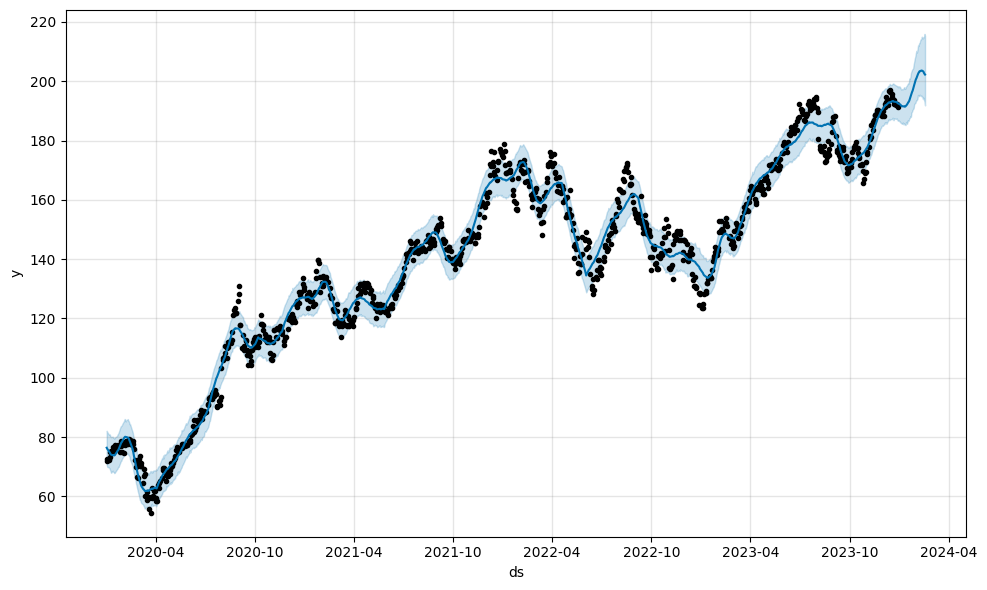

In [ ]:
# Train the best model with optimized parameters
best_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale']
)

# Fit the model with the dataset
best_model.fit(prophet_data)

# Create future dates for prediction (e.g., next 50 days)
future = best_model.make_future_dataframe(periods=50)

# Make predictions
forecast = best_model.predict(future)

# Evaluate the new model
y_true = stock_data['Close'].iloc[-50:]  # Actual values for last 50 days
y_pred = forecast['yhat'].iloc[-50:]     # Predicted values for last 50 days

# Compute metrics
rmse_final = np.sqrt(mean_squared_error(y_true, y_pred))
mae_final = mean_absolute_error(y_true, y_pred)

# Print evaluation results
print(f" Optimized Prophet RMSE: {rmse_final:.2f}")
print(f"Optimized Prophet MAE: {mae_final:.2f}")

# Plot the forecast
fig1 = best_model.plot(forecast)


### Model Performance Comparison

| Model                | RMSE  | MAE  |
|----------------------|------|------|
| **ARIMA (2,1,1)**   | 1.86 | 1.47 |
| **SARIMA (1,1,1,12)** | 1.87 | 1.50 |
| **Linear Regression** | 2.12 | 1.61 |
| **Random Forest**     | 9.05 | 6.40 |
| **Prophet (Default)** | 11.79 | 10.27 |
| **Prophet (Optimized)** | 12.29 | 10.86 |

**Best Model:** ARIMA/SARIMA (lowest RMSE & MAE)  


ARIMA and SARIMA performed best, with RMSE around 1.86-1.87.

Linear Regression is close, but not as good as ARIMA.


Random Forest performed poorly, possibly due to financial data instability.

Prophet failed to capture short-term fluctuations, leading to high RMSE &

MAE even after hyperparameter tuning.

# Neural Network - LSTM

In [ ]:
# Install TensorFlow (
!pip install tensorflow -q

# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(stock_data[['Close']])


In [ ]:
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # Take the last 'seq_length' days
        y.append(data[i+seq_length])    # Predict the next value
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 50

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Split into training and testing sets
split = int(len(X) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape X for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),  # First LSTM layer
    Dropout(0.2),  # Regularization

    LSTM(units=50, return_sequences=True),  # Second LSTM layer
    Dropout(0.2),

    LSTM(units=50, return_sequences=False),  # Third LSTM layer
    Dropout(0.2),

    Dense(units=25),  # Dense layer with 25 neurons
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,101 (203.52 KB)

 Trainable params: 52,101 (203.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.1273 - val_loss: 0.0019
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0074 - val_loss: 0.0043
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0063 - val_loss: 0.0098
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0054 - val_loss: 0.0024
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0055 - val_loss: 0.0040
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0050 - val_loss: 0.0055
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 

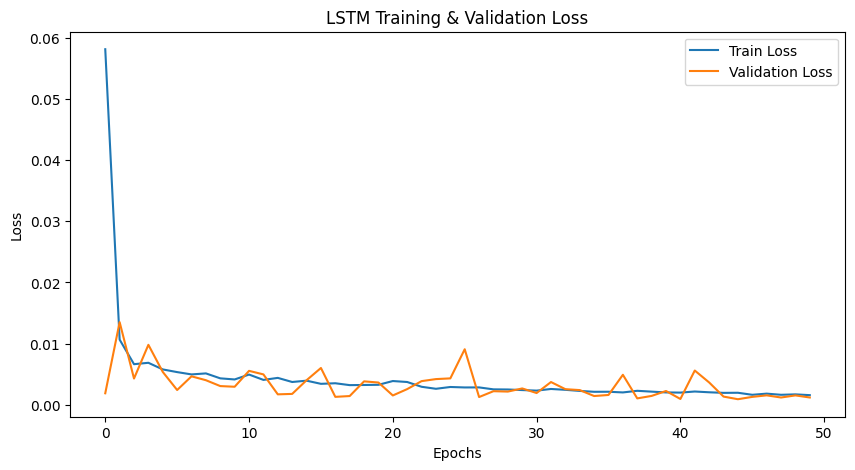

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("LSTM Training & Validation Loss")
plt.show()


**The loss is decreasing over epochs, indicating that the model is learning.**

**Model Evaluation & Predictions**

In [ ]:
# Make predictions
y_pred_lstm = model.predict(X_test)

# Reverse scaling
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse_lstm = np.sqrt(mean_squared_error(y_test_original, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_original, y_pred_lstm)

print(f" LSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAE: {mae_lstm:.2f}")


 LSTM RMSE: 4.88
LSTM MAE: 4.17


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test_original.flatten(), mode='lines', name='Actual Prices', line=dict(color='blue')))
fig.add_trace(go.Scatter(y=y_pred_lstm.flatten(), mode='lines', name='LSTM Predictions', line=dict(color='red', dash='dot')))
fig.update_layout(title="LSTM Forecast vs Actual Prices", xaxis_title="Time", yaxis_title="Price")
fig.show()


In [ ]:
seq_length = 100  # Increase from 50 to 100


In [ ]:
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.3),

    LSTM(units=100, return_sequences=True),
    Dropout(0.3),

    LSTM(units=100, return_sequences=False),
    Dropout(0.3),

    Dense(units=50, activation='relu'),
    Dense(units=1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,701 (807.43 KB)

 Trainable params: 206,701 (807.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - loss: 0.1216 - val_loss: 0.0497
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0111 - val_loss: 0.0038
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - loss: 0.0072 - val_loss: 0.0046
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - loss: 0.0054 - val_loss: 0.0072
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.0042 - val_loss: 0.0069
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - loss: 0.0038 - val_loss: 0.0092
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0037 - val_loss: 0.0057
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0043 - val_loss: 0.0057
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Make predictions
y_pred_lstm = model.predict(X_test)

# Reverse scaling (convert back to original stock price scale)
y_pred_inv = scaler.inverse_transform(y_pred_lstm)
y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))

# Import Plotly for visualization
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Plot actual stock prices
fig.add_trace(go.Scatter(y=y_test_original.flatten(), mode='lines',
                         name='Actual Prices', line=dict(color='blue')))

# Plot LSTM predicted stock prices
fig.add_trace(go.Scatter(y=y_pred_inv.flatten(), mode='lines',
                         name='LSTM Predictions', line=dict(color='red', dash='dot')))

# Customize layout
fig.update_layout(title="LSTM Forecast vs Actual Prices",
                  xaxis_title="Time", yaxis_title="Stock Price")

# Show the plot
fig.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step



###  Model Comparison Report  


This report evaluates the performance of various time series forecasting models for stock price prediction. The models include:  
- **Traditional Models**: ARIMA, SARIMA  
- **Machine Learning Models**: Linear Regression, Random Forest  
- **Deep Learning Model**: LSTM  
- **Facebook Prophet**  

The models are compared using **RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error)** to determine which method provides the most accurate forecast.  


### Performance Metrics Overview

| Model                 | RMSE   | MAE   |  
|-----------------------|--------|--------|  
| **ARIMA (2,1,1)**     | **1.86** | **1.47** |  
| **SARIMA (1,1,1,12)** | **1.87** | **1.50** |  
| **Linear Regression** | 2.12   | 1.61   |  
| **Random Forest**     | 9.05   | 6.40   |  
| **Prophet  | 11.79  | 10.27  |   
| **LSTM ** | **4.88** | **4.17** |  

### Model Comparisons & Observations

####  **Traditional Models: ARIMA & SARIMA**  
- **Best performers** in terms of **RMSE & MAE**.  
- ARIMA and SARIMA captured trends well, making them suitable for **stationary** time series data.  
- SARIMA slightly improved ARIMA by considering **seasonality**.  

####  **Machine Learning Models: Linear Regression & Random Forest**  
- **Linear Regression** performed decently but **not as well as ARIMA** due to the complex nature of stock price movements.  
- **Random Forest performed poorly** (RMSE = **9.05**) since it does not handle time dependencies well.  

####  **Facebook Prophet**  
- Performed **poorly with RMSE > 11**, failing to capture short-term fluctuations.  
- Even after **hyperparameter tuning**, RMSE remained high.  

####  **LSTM Model**  
- **Struggled with lagging predictions** and produced **smoother outputs**.  
- RMSE (**4.88**) was **worse than ARIMA**, but LSTM still learned long-term dependencies.  
- May improve with **more data, additional features (like moving averages), or hybrid models**.  

###  Advantages & Limitations of Each Approach

| Model  | Advantages   | Limitations   |  
|--------|-------------|--------------|  
| **ARIMA** | Best for short-term forecasting | Assumes stationarity, no seasonality |  
| **SARIMA** | Captures seasonal patterns | Computationally expensive |  
| **Linear Regression** | Simple, interpretable | Not ideal for time series |  
| **Random Forest** | Good for non-linear trends | Ignores time dependencies |  
| **Prophet** | Good for long-term trends | Poor for short-term stock movements |  
| **LSTM** | Captures patterns, learns dependencies | Requires large datasets, lagging predictions |  


### **Improvement**    
**Feature Engineering**: Add technical indicators like **Moving Averages (SMA, EMA), RSI, or Volume**.  
**Hyperparameter Tuning**: Increase **sequence length**, try **bidirectional LSTMs**, and experiment with different optimizers.  


### **Conclusion**  
- **ARIMA and SARIMA were the best models** for this dataset, with **lowest RMSE & MAE**.  
- **LSTM, despite being deep learning-based, underperformed** and struggled with prediction lag.  
- **Machine Learning models (Random Forest & Linear Regression) were less effective** due to the nature of stock prices.  
- **Prophet was the worst performer**, failing to capture short-term fluctuations.   
